# Project Metadata & Setup

---

## **Project Title:** **Early Breast Cancer Diagnosis using Machine Learning (Terminal-Based Prototype)**

---

### **Objective:**

Develop a lightweight, terminal-driven diagnostic prototype that predicts breast tumor malignancy using the built-in Breast Cancer Wisconsin dataset.
The goal is to simulate how a clinician or technician might use a fast, interpretable tool, without a full GUI or web app.


### **Dataset Description:**

* **Name:** Breast Cancer Wisconsin (Diagnostic)
* **Source:** `sklearn.datasets.load_breast_cancer()`
* **Samples:** 569
* **Features:** 30 numerical (e.g. radius, texture, symmetry)
* **Target:** Binary classification — `malignant (0)` vs. `benign (1)`



### **Stakeholders:**

| Stakeholder          | Interest / Use Case                                              |
| -------------------- | ---------------------------------------------------------------- |
| **Clinicians**       | Fast, interpretable predictions without cloud dependency         |
| **Researchers**      | Baseline model to compare with deep learning or ensemble methods |
| **Medical Startups** | Prototype backend logic for terminal-based tools                 |
| **Educators**        | Teaching ML with meaningful, real-world data                     |


### **Key Notes for Revision:**

* **No GPU required** — uses efficient `RandomForestClassifier`
* **Runs locally** in terminal with zero external dataset download
* **Emphasis on simplicity**: ASCII feedback, clean input prompts
* **Can be modularized later** into API or UI backend
* **We’ll skip test/train splitting** for now — prototype phase only


### **Environment Requirements:**

| Package    | Use                          |
| ---------- | ---------------------------- |
| `sklearn`  | Dataset + ML model           |
| `pandas`   | Tabular data inspection      |
| `colorama` | Terminal coloring (optional) |
| `numpy`    | Data handling                |

---

### Install (if not present):

```bash
pip install pandas scikit-learn colorama
```


### Deliverables:

* Classifier trained on breast cancer dataset
* Real-time terminal prediction system
* ASCII output or basic feedback UI for predicted diagnosis
* Clean, commented code blocks
* Professional markdown formatting with revision comments


## STEP 1: Load and Explore the Breast Cancer Dataset


### **Objective:**

* Load the Breast Cancer Wisconsin dataset directly from `sklearn`
* Convert to a `pandas.DataFrame` for readability
* Summarize the dataset structure and feature information
* Confirm class distribution (very important in medical ML)


### **Background Insight for Stakeholders:**

* The data represent **digitized characteristics of cell nuclei** from fine-needle aspirates of breast masses.
* 30 numerical features are calculated from images (e.g., mean radius, standard error of texture, worst smoothness).
* The target is **binary**:

  * `0 = malignant` (cancerous)
  * `1 = benign` (non-cancerous)


### **Code Block: Load + Inspect Data**

In [12]:
# STEP 1: Load & Inspect Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset from sklearn
cancer = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add target labels
df['target'] = cancer.target
df['target_name'] = df['target'].map(lambda x: cancer.target_names[x])

# Summary outputs
print("🧬 Dataset Dimensions:", df.shape)
print("🔢 Number of Features:", len(cancer.feature_names))
print("🎯 Target Labels:", list(cancer.target_names))
print("\n📊 Class Distribution:")
print(df['target_name'].value_counts())

# Preview sample records
df.sample(5)

🧬 Dataset Dimensions: (569, 32)
🔢 Number of Features: 30
🎯 Target Labels: [np.str_('malignant'), np.str_('benign')]

📊 Class Distribution:
target_name
benign       357
malignant    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
375,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,...,113.10,861.5,0.12350,0.25500,0.21140,0.12510,0.3153,0.08960,1,benign
270,14.29,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1,benign
243,13.75,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,0.1773,0.05429,...,98.00,706.0,0.09368,0.14420,0.13590,0.06106,0.2663,0.06321,1,benign
50,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,...,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563,1,benign
328,16.27,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.06277,...,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200,0,malignant



### Notes for Revision:

* **Shape:** `(569, 32)` → 569 observations, 30 features + 1 label + 1 label name
* **Target imbalance:** More benign than malignant cases → might require stratified validation later
* `target_name` column added for human-readability
###  Example Output (Typical):

🧬 Dataset Dimensions: (569, 32)
🔢 Number of Features: 30
🎯 Target Labels: ['malignant', 'benign']

📊 Class Distribution:
benign       357
malignant    212
Name: target_name, dtype: int64


## STEP 2: Train the Classifier


### Objective:

Train a **Random Forest Classifier** on the full dataset.
This prototype focuses on prediction responsiveness — no test/train split or cross-validation yet.


### Model Choice Justification:

| Model                    | Reason for Selection                                                         |
| ------------------------ | ---------------------------------------------------------------------------- |
| `RandomForestClassifier` | Fast to train, robust to outliers, good with non-linear feature interactions |
| `n_estimators=100`       | Balances accuracy and inference speed                                        |
| `random_state=42`        | Ensures repeatable results                                                   |

This setup fits our terminal-based use case — quick predictions and stable accuracy.


### Code Block: Train the Model




In [13]:
# STEP 2: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Prepare feature matrix X and target vector y
X = cancer.data
y = cancer.target

# Initialize classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on entire dataset (prototype phase)
clf.fit(X, y)

# Evaluate on training set
train_accuracy = clf.score(X, y)
print(f"Training Accuracy: {train_accuracy:.2%}")

Training Accuracy: 100.00%


### Notes for Revision:

* `clf.fit(X, y)` trains on all 569 samples
* Accuracy may look very high (\~99%) — acceptable for a prototype, but must validate later with real test data
* For a full deployment, we’d use `train_test_split()` and stratified validation folds

## New Scenario:

### **“Quick Diagnosis Assistant”**

Instead of inputting all 30 features manually, we:

* **Randomly sample a case** from the dataset
* Display its features to simulate "incoming patient data"
* Ask the user:
  *"Would you like to diagnose this case?"*
* Then we **predict and show results** using the trained model

No typing 30 numbers. Still real. Still sharp. Still interactive.


## STEP 3 (Revised): Sample and Diagnose a Case


### Objective:

* Randomly pull a sample case from the dataset
* Show the 5–7 most meaningful features (not all 30)
* Let the model predict and show the result
* Give option to keep looping or exit

In [15]:
# STEP 3 (REVISED): Simulated Patient Diagnosis
import numpy as np
import random

# Define which features to show (select top 6 visually intuitive ones)
selected_features = [
    'mean radius',
    'mean texture',
    'mean perimeter',
    'mean area',
    'worst concavity',
    'worst symmetry'
]

# Get feature indices
feature_indices = [list(cancer.feature_names).index(f) for f in selected_features]

def sample_and_diagnose(model, X, y, feature_names, n=1):
    while True:
        index = random.randint(0, len(X) - 1)
        sample = X[index]
        label = y[index]
        
        print("\n--- New Patient Case ---")
        for i in feature_indices:
            print(f"{feature_names[i]}: {sample[i]:.2f}")
        
        confirm = input("\nRun diagnosis? (y/n): ").strip().lower()
        if confirm != 'y':
            cont = input("Skip to next case? (y/n): ").strip().lower()
            if cont != 'y':
                print("\nSession ended.")
                break
            else:
                continue

        # Predict
        pred = model.predict(sample.reshape(1, -1))[0]
        label_actual = cancer.target_names[label]
        label_pred = cancer.target_names[pred]
        
        print("\nDiagnosis Prediction:")
        print(f"  → Predicted: {label_pred.upper()}")
        print(f"  → Actual:    {label_actual.upper()}")
        
        cont = input("\nRun another case? (y/n): ").strip().lower()
        if cont != 'y':
            print("\nSession ended.")
            break

# Run the simulation
sample_and_diagnose(clf, cancer.data, cancer.target, cancer.feature_names)


--- New Patient Case ---
mean radius: 9.90
mean texture: 18.06
mean perimeter: 64.60
mean area: 302.40
worst concavity: 0.35
worst symmetry: 0.26



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 10.75
mean texture: 14.97
mean perimeter: 68.26
mean area: 355.30
worst concavity: 0.10
worst symmetry: 0.23



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 14.99
mean texture: 25.20
mean perimeter: 95.54
mean area: 698.80
worst concavity: 0.02
worst symmetry: 0.16



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 14.99
mean texture: 25.20
mean perimeter: 95.54
mean area: 698.80
worst concavity: 0.02
worst symmetry: 0.16



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 9.74
mean texture: 11.97
mean perimeter: 61.24
mean area: 288.50
worst concavity: 0.00
worst symmetry: 0.31



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 17.19
mean texture: 22.07
mean perimeter: 111.60
mean area: 928.30
worst concavity: 0.39
worst symmetry: 0.32



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 14.44
mean texture: 15.18
mean perimeter: 93.97
mean area: 640.10
worst concavity: 0.31
worst symmetry: 0.27



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.72
mean texture: 13.78
mean perimeter: 81.78
mean area: 492.10
worst concavity: 0.05
worst symmetry: 0.24



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 20.13
mean texture: 28.25
mean perimeter: 131.20
mean area: 1261.00
worst concavity: 0.32
worst symmetry: 0.26



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 20.26
mean texture: 23.03
mean perimeter: 132.40
mean area: 1264.00
worst concavity: 0.41
worst symmetry: 0.37



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 18.46
mean texture: 18.52
mean perimeter: 121.10
mean area: 1075.00
worst concavity: 0.32
worst symmetry: 0.37



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 9.67
mean texture: 18.49
mean perimeter: 61.49
mean area: 289.10
worst concavity: 0.13
worst symmetry: 0.32



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 23.27
mean texture: 22.04
mean perimeter: 152.10
mean area: 1686.00
worst concavity: 0.39
worst symmetry: 0.36



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.80
mean texture: 17.26
mean perimeter: 75.26
mean area: 431.90
worst concavity: 0.14
worst symmetry: 0.28



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.29
mean texture: 13.04
mean perimeter: 72.23
mean area: 388.00
worst concavity: 0.13
worst symmetry: 0.27



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.63
mean texture: 20.76
mean perimeter: 82.15
mean area: 480.40
worst concavity: 0.22
worst symmetry: 0.22



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.34
mean texture: 15.86
mean perimeter: 86.49
mean area: 520.00
worst concavity: 0.49
worst symmetry: 0.35



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 16.84
mean texture: 19.46
mean perimeter: 108.40
mean area: 880.20
worst concavity: 0.19
worst symmetry: 0.25



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 9.74
mean texture: 11.97
mean perimeter: 61.24
mean area: 288.50
worst concavity: 0.00
worst symmetry: 0.31



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 18.49
mean texture: 17.52
mean perimeter: 121.30
mean area: 1068.00
worst concavity: 0.35
worst symmetry: 0.25



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 15.78
mean texture: 22.91
mean perimeter: 105.70
mean area: 782.60
worst concavity: 0.74
worst symmetry: 0.33



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 20.44
mean texture: 21.78
mean perimeter: 133.80
mean area: 1293.00
worst concavity: 0.27
worst symmetry: 0.26



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 15.50
mean texture: 21.08
mean perimeter: 102.90
mean area: 803.10
worst concavity: 0.42
worst symmetry: 0.30



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 9.40
mean texture: 21.70
mean perimeter: 59.60
mean area: 271.20
worst concavity: 0.06
worst symmetry: 0.29



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.75
mean texture: 23.77
mean perimeter: 88.54
mean area: 590.00
worst concavity: 0.14
worst symmetry: 0.27



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.17
mean texture: 18.22
mean perimeter: 84.28
mean area: 537.30
worst concavity: 0.19
worst symmetry: 0.22



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 9.40
mean texture: 21.70
mean perimeter: 59.60
mean area: 271.20
worst concavity: 0.06
worst symmetry: 0.29



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.69
mean texture: 24.44
mean perimeter: 76.37
mean area: 406.40
worst concavity: 0.14
worst symmetry: 0.28



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 16.17
mean texture: 16.07
mean perimeter: 106.30
mean area: 788.50
worst concavity: 0.21
worst symmetry: 0.32



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 20.58
mean texture: 22.14
mean perimeter: 134.70
mean area: 1290.00
worst concavity: 0.39
worst symmetry: 0.29



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 15.10
mean texture: 16.39
mean perimeter: 99.58
mean area: 674.50
worst concavity: 0.20
worst symmetry: 0.26



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.13
mean texture: 22.44
mean perimeter: 71.49
mean area: 378.40
worst concavity: 0.16
worst symmetry: 0.32



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.46
mean texture: 18.75
mean perimeter: 87.44
mean area: 551.10
worst concavity: 0.27
worst symmetry: 0.35



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 9.17
mean texture: 13.86
mean perimeter: 59.20
mean area: 260.90
worst concavity: 0.14
worst symmetry: 0.33



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.22
mean texture: 20.04
mean perimeter: 79.47
mean area: 453.10
worst concavity: 0.35
worst symmetry: 0.27



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.81
mean texture: 13.06
mean perimeter: 81.29
mean area: 508.80
worst concavity: 0.03
worst symmetry: 0.18



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.90
mean texture: 19.24
mean perimeter: 88.73
mean area: 602.90
worst concavity: 0.17
worst symmetry: 0.24



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 17.93
mean texture: 24.48
mean perimeter: 115.20
mean area: 998.90
worst concavity: 0.21
worst symmetry: 0.25



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 15.78
mean texture: 17.89
mean perimeter: 103.60
mean area: 781.00
worst concavity: 0.40
worst symmetry: 0.38



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 10.65
mean texture: 25.22
mean perimeter: 68.01
mean area: 347.00
worst concavity: 0.11
worst symmetry: 0.34



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.18
mean texture: 20.52
mean perimeter: 77.22
mean area: 458.70
worst concavity: 0.11
worst symmetry: 0.27



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 15.22
mean texture: 30.62
mean perimeter: 103.40
mean area: 716.90
worst concavity: 1.17
worst symmetry: 0.41



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.87
mean texture: 21.54
mean perimeter: 76.83
mean area: 432.00
worst concavity: 0.32
worst symmetry: 0.23



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.04
mean texture: 28.14
mean perimeter: 76.85
mean area: 449.90
worst concavity: 0.06
worst symmetry: 0.24



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.54
mean texture: 14.44
mean perimeter: 74.65
mean area: 402.90
worst concavity: 0.18
worst symmetry: 0.23



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 9.85
mean texture: 15.68
mean perimeter: 63.00
mean area: 293.20
worst concavity: 0.08
worst symmetry: 0.25



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 14.11
mean texture: 12.88
mean perimeter: 90.03
mean area: 616.50
worst concavity: 0.05
worst symmetry: 0.21



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.86
mean texture: 13.32
mean perimeter: 82.82
mean area: 504.80
worst concavity: 0.18
worst symmetry: 0.24



Run diagnosis? (y/n):  
Skip to next case? (y/n):  y



--- New Patient Case ---
mean radius: 12.95
mean texture: 16.02
mean perimeter: 83.14
mean area: 513.70
worst concavity: 0.22
worst symmetry: 0.34



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN



Run another case? (y/n):  



Session ended.


### Code Block: Simulated Case Prediction

### Notes:

* You review a patient case like a **doctor with a clipboard**
* Model handles backend prediction
* You decide if it should run or skip
* Actual label shown for reference, but this could be hidden in real use

## STEP 4: Add Confidence Scores and Model Certainty

### Objective:

Display **how confident** the model is in its prediction, not just the class label.

This is critical in any clinical or decision-support context — we don’t just want a binary label, we want to know **how certain** the model is.


### Tools Used:

| Function              | Purpose                              |
| --------------------- | ------------------------------------ |
| `predict_proba(X)`    | Returns array of class probabilities |
| `np.max()`            | Extracts top confidence score        |
| `colorama` (optional) | Highlights high/low confidence       |


### Code Block: Display Confidence

In [18]:
from sklearn.metrics import accuracy_score
from colorama import Fore, Style

def sample_and_diagnose_with_confidence(model, X, y, feature_names, n=1):
    while True:
        index = random.randint(0, len(X) - 1)
        sample = X[index]
        label = y[index]
        
        print("\n--- New Patient Case ---")
        for i in feature_indices:
            print(f"{feature_names[i]}: {sample[i]:.2f}")
        
        confirm = input("\nRun diagnosis? (y/n): ").strip().lower()
        if confirm != 'y':
            cont = input("Skip to next case? (y/n): ").strip().lower()
            if cont != 'y':
                print("\nSession ended.")
                break
            else:
                continue

        # Predict and get probability
        pred = model.predict(sample.reshape(1, -1))[0]
        prob = model.predict_proba(sample.reshape(1, -1))[0]
        confidence = np.max(prob)
        
        label_actual = cancer.target_names[label]
        label_pred = cancer.target_names[pred]

        print("\nDiagnosis Prediction:")
        if confidence >= 0.90:
            color = Fore.GREEN
        elif confidence >= 0.75:
            color = Fore.YELLOW
        else:
            color = Fore.RED

        print(f"  → Predicted: {label_pred.upper()}")
        print(f"  → Confidence: {color}{confidence:.2%}{Style.RESET_ALL}")
        print(f"  → Actual:    {label_actual.upper()}")

        cont = input("\nRun another case? (y/n): ").strip().lower()
        if cont != 'y':
            print("\nSession ended.")
            break

# Run enhanced simulation
sample_and_diagnose_with_confidence(clf, cancer.data, cancer.target, cancer.feature_names)


--- New Patient Case ---
mean radius: 13.00
mean texture: 20.78
mean perimeter: 83.51
mean area: 519.40
worst concavity: 0.08
worst symmetry: 0.32



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.58
mean texture: 18.40
mean perimeter: 79.83
mean area: 489.00
worst concavity: 0.01
worst symmetry: 0.25



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.03
mean texture: 17.93
mean perimeter: 76.09
mean area: 446.00
worst concavity: 0.01
worst symmetry: 0.22



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.47
mean texture: 18.60
mean perimeter: 81.09
mean area: 481.90
worst concavity: 0.27
worst symmetry: 0.30



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.00
mean texture: 28.23
mean perimeter: 76.77
mean area: 442.50
worst concavity: 0.18
worst symmetry: 0.24



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 19.44
mean texture: 18.82
mean perimeter: 128.10
mean area: 1167.00
worst concavity: 0.59
worst symmetry: 0.33



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.37
mean texture: 16.39
mean perimeter: 86.10
mean area: 553.50
worst concavity: 0.33
worst symmetry: 0.20



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.29
mean texture: 13.04
mean perimeter: 72.23
mean area: 388.00
worst concavity: 0.13
worst symmetry: 0.27



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 25.22
mean texture: 24.91
mean perimeter: 171.50
mean area: 1878.00
worst concavity: 0.65
worst symmetry: 0.24



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.75
mean texture: 16.70
mean perimeter: 82.51
mean area: 493.80
worst concavity: 0.14
worst symmetry: 0.31



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 20.16
mean texture: 19.66
mean perimeter: 131.10
mean area: 1274.00
worst concavity: 0.26
worst symmetry: 0.31



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 99.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.13
mean texture: 16.62
mean perimeter: 70.47
mean area: 381.10
worst concavity: 0.05
worst symmetry: 0.24



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 14.42
mean texture: 16.54
mean perimeter: 94.15
mean area: 641.20
worst concavity: 0.38
worst symmetry: 0.31



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 82.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 15.71
mean texture: 13.93
mean perimeter: 102.00
mean area: 761.70
worst concavity: 0.17
worst symmetry: 0.27



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 86.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 16.69
mean texture: 20.20
mean perimeter: 107.10
mean area: 857.60
worst concavity: 0.25
worst symmetry: 0.47



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 94.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 17.99
mean texture: 10.38
mean perimeter: 122.80
mean area: 1001.00
worst concavity: 0.71
worst symmetry: 0.46



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 96.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.84
mean texture: 18.70
mean perimeter: 77.93
mean area: 440.60
worst concavity: 0.70
worst symmetry: 0.48



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 95.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 20.26
mean texture: 23.03
mean perimeter: 132.40
mean area: 1264.00
worst concavity: 0.41
worst symmetry: 0.37



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.77
mean texture: 29.43
mean perimeter: 81.35
mean area: 507.90
worst concavity: 0.09
worst symmetry: 0.24



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 19.10
mean texture: 26.29
mean perimeter: 129.10
mean area: 1132.00
worst concavity: 0.24
worst symmetry: 0.23



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 99.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 18.61
mean texture: 20.25
mean perimeter: 122.10
mean area: 1094.00
worst concavity: 0.34
worst symmetry: 0.23



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 18.05
mean texture: 16.15
mean perimeter: 120.20
mean area: 1006.00
worst concavity: 0.38
worst symmetry: 0.38



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.86
mean texture: 18.00
mean perimeter: 83.19
mean area: 506.30
worst concavity: 0.17
worst symmetry: 0.28



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.54
mean texture: 14.36
mean perimeter: 87.46
mean area: 566.30
worst concavity: 0.24
worst symmetry: 0.30



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 99.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 8.95
mean texture: 15.76
mean perimeter: 58.74
mean area: 245.20
worst concavity: 0.15
worst symmetry: 0.17



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 99.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.80
mean texture: 15.79
mean perimeter: 90.43
mean area: 584.10
worst concavity: 0.28
worst symmetry: 0.26



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 71.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.73
mean texture: 22.61
mean perimeter: 93.60
mean area: 578.30
worst concavity: 0.69
worst symmetry: 0.36



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 96.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 9.72
mean texture: 18.22
mean perimeter: 60.73
mean area: 288.10
worst concavity: 0.00
worst symmetry: 0.19



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 99.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.82
mean texture: 24.49
mean perimeter: 92.33
mean area: 595.90
worst concavity: 0.34
worst symmetry: 0.37



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 93.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.15
mean texture: 13.08
mean perimeter: 70.87
mean area: 381.90
worst concavity: 0.07
worst symmetry: 0.29



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 17.75
mean texture: 28.03
mean perimeter: 117.30
mean area: 981.60
worst concavity: 0.64
worst symmetry: 0.30



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.05
mean texture: 18.59
mean perimeter: 85.09
mean area: 512.00
worst concavity: 0.26
worst symmetry: 0.31



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 95.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 18.66
mean texture: 17.12
mean perimeter: 121.40
mean area: 1077.00
worst concavity: 0.33
worst symmetry: 0.29



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 14.26
mean texture: 18.17
mean perimeter: 91.22
mean area: 633.10
worst concavity: 0.16
worst symmetry: 0.26



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 99.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.61
mean texture: 16.02
mean perimeter: 75.46
mean area: 408.20
worst concavity: 0.23
worst symmetry: 0.28



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.21
mean texture: 18.02
mean perimeter: 78.31
mean area: 458.40
worst concavity: 0.24
worst symmetry: 0.32



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.16
mean texture: 18.03
mean perimeter: 78.29
mean area: 455.30
worst concavity: 0.16
worst symmetry: 0.24



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.28
mean texture: 13.72
mean perimeter: 85.79
mean area: 541.80
worst concavity: 0.29
worst symmetry: 0.27



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 20.29
mean texture: 14.34
mean perimeter: 135.10
mean area: 1297.00
worst concavity: 0.40
worst symmetry: 0.24



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 98.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 20.47
mean texture: 20.67
mean perimeter: 134.70
mean area: 1299.00
worst concavity: 0.31
worst symmetry: 0.32



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.37
mean texture: 18.89
mean perimeter: 72.17
mean area: 396.00
worst concavity: 0.08
worst symmetry: 0.33



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.51
mean texture: 23.93
mean perimeter: 74.52
mean area: 403.50
worst concavity: 0.36
worst symmetry: 0.21



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 94.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.76
mean texture: 21.60
mean perimeter: 74.72
mean area: 427.90
worst concavity: 0.06
worst symmetry: 0.24



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.99
mean texture: 24.89
mean perimeter: 77.61
mean area: 441.30
worst concavity: 0.16
worst symmetry: 0.26



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.76
mean texture: 18.84
mean perimeter: 81.87
mean area: 496.60
worst concavity: 0.13
worst symmetry: 0.27



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 14.96
mean texture: 19.10
mean perimeter: 97.03
mean area: 687.30
worst concavity: 0.18
worst symmetry: 0.30



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 90.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 28.11
mean texture: 18.47
mean perimeter: 188.50
mean area: 2499.00
worst concavity: 0.32
worst symmetry: 0.16



Run diagnosis? (y/n):  yy
Skip to next case? (y/n):  y



--- New Patient Case ---
mean radius: 16.60
mean texture: 28.08
mean perimeter: 108.30
mean area: 858.10
worst concavity: 0.34
worst symmetry: 0.22



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 20.57
mean texture: 17.77
mean perimeter: 132.90
mean area: 1326.00
worst concavity: 0.24
worst symmetry: 0.28



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 99.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 9.40
mean texture: 21.68
mean perimeter: 59.75
mean area: 268.80
worst concavity: 0.19
worst symmetry: 0.24



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.45
mean texture: 20.97
mean perimeter: 73.81
mean area: 401.50
worst concavity: 0.18
worst symmetry: 0.28



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 99.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 16.14
mean texture: 14.86
mean perimeter: 104.30
mean area: 800.00
worst concavity: 0.23
worst symmetry: 0.28



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 73.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 14.42
mean texture: 19.77
mean perimeter: 94.48
mean area: 642.50
worst concavity: 0.32
worst symmetry: 0.27



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 90.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  



Session ended.


### Notes:

* Adds `predict_proba()` to show probability
* Uses color to **visually flag confidence**:

  * Green = strong confidence
  * Yellow = moderate
  * Red = weak/conflicted
* More aligned with how clinicians review uncertainty in diagnostics

**Step 4 complete. Time to close the loop with Step 5 — logging and export.**


## STEP 5: Log Predictions for Audit or Review

### 🎯 Objective:

Record each prediction in a **session log** for review, audit, or retraining.
In medical tools, **traceability** is essential — even in prototypes.

We'll log:

* Sample index
* Selected feature values
* Predicted class
* Actual class
* Model confidence

The log can be printed live or saved to CSV/JSON for analysis.

### Code Block: Logging Predictions


In [21]:
import csv

def sample_and_diagnose_with_logging(model, X, y, feature_names, log_path="diagnosis_log.csv"):
    log_fields = [
        'index',
        'predicted_label',
        'actual_label',
        'confidence',
    ] + [feature_names[i] for i in feature_indices]

    log_data = []

    while True:
        index = random.randint(0, len(X) - 1)
        sample = X[index]
        label = y[index]

        print("\n--- New Patient Case ---")
        for i in feature_indices:
            print(f"{feature_names[i]}: {sample[i]:.2f}")
        
        confirm = input("\nRun diagnosis? (y/n): ").strip().lower()
        if confirm != 'y':
            cont = input("Skip to next case? (y/n): ").strip().lower()
            if cont != 'y':
                print("\nSession ended.")
                break
            else:
                continue

        pred = model.predict(sample.reshape(1, -1))[0]
        prob = model.predict_proba(sample.reshape(1, -1))[0]
        confidence = np.max(prob)

        label_pred = cancer.target_names[pred]
        label_actual = cancer.target_names[label]

        print("\nDiagnosis Prediction:")
        print(f"  → Predicted: {label_pred.upper()}")
        print(f"  → Confidence: {confidence:.2%}")
        print(f"  → Actual:    {label_actual.upper()}")

        # Log entry
        entry = {
            'index': index,
            'predicted_label': label_pred,
            'actual_label': label_actual,
            'confidence': round(confidence, 4)
        }
        for i in feature_indices:
            entry[feature_names[i]] = round(sample[i], 3)
        log_data.append(entry)

        cont = input("\nRun another case? (y/n): ").strip().lower()
        if cont != 'y':
            break

    # Save log at end
    with open(log_path, mode='w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=log_fields)
        writer.writeheader()
        writer.writerows(log_data)

    print(f"\nSession log saved to: {log_path}")

# Run with logging enabled
sample_and_diagnose_with_logging(clf, cancer.data, cancer.target, cancer.feature_names)


--- New Patient Case ---
mean radius: 9.85
mean texture: 15.68
mean perimeter: 63.00
mean area: 293.20
worst concavity: 0.08
worst symmetry: 0.25



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 99.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 19.59
mean texture: 25.00
mean perimeter: 127.70
mean area: 1191.00
worst concavity: 0.40
worst symmetry: 0.23



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 11.14
mean texture: 14.07
mean perimeter: 71.24
mean area: 384.60
worst concavity: 0.12
worst symmetry: 0.26



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 12.07
mean texture: 13.44
mean perimeter: 77.83
mean area: 445.20
worst concavity: 0.16
worst symmetry: 0.28



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 17.75
mean texture: 28.03
mean perimeter: 117.30
mean area: 981.60
worst concavity: 0.64
worst symmetry: 0.30



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.17
mean texture: 18.66
mean perimeter: 85.98
mean area: 534.60
worst concavity: 0.50
worst symmetry: 0.39



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 95.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 15.73
mean texture: 11.28
mean perimeter: 102.80
mean area: 747.20
worst concavity: 0.40
worst symmetry: 0.26



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 74.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 14.87
mean texture: 16.67
mean perimeter: 98.64
mean area: 682.50
worst concavity: 0.47
worst symmetry: 0.36



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 14.80
mean texture: 17.66
mean perimeter: 95.88
mean area: 674.80
worst concavity: 0.21
worst symmetry: 0.36



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 97.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 18.22
mean texture: 18.70
mean perimeter: 120.30
mean area: 1033.00
worst concavity: 0.26
worst symmetry: 0.30



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 98.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 14.53
mean texture: 13.98
mean perimeter: 93.86
mean area: 644.20
worst concavity: 0.14
worst symmetry: 0.26



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 97.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 13.71
mean texture: 20.83
mean perimeter: 90.20
mean area: 577.90
worst concavity: 0.27
worst symmetry: 0.32



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 96.00%
  → Actual:    MALIGNANT



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 10.17
mean texture: 14.88
mean perimeter: 64.55
mean area: 311.90
worst concavity: 0.02
worst symmetry: 0.36



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  y



--- New Patient Case ---
mean radius: 8.20
mean texture: 16.84
mean perimeter: 51.71
mean area: 201.90
worst concavity: 0.07
worst symmetry: 0.31



Run diagnosis? (y/n):  y



Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN



Run another case? (y/n):  



Session log saved to: diagnosis_log.csv


### Notes:

* Log is written to `diagnosis_log.csv` in the current directory
* Columns: index, predicted/actual, confidence, plus select features
* Can later be loaded into pandas for analysis or model debugging

**Alright. Phase 1 (Interactive Diagnostic Prototype) is complete.**
Now we step into **Phase 2**: Analysis and Evaluation.


## STEP 6: Evaluate Model Performance on Entire Dataset


### 🎯 Objective:

Quantify model performance beyond training accuracy using standard metrics:

* Confusion matrix
* Classification report (precision, recall, F1)
* Visual overview of performance per class

This will tell us:

* How well the model distinguishes between **malignant** and **benign**
* Whether it's biased toward one class
* If any tuning is needed before deployment

---

### Code Block: Model Evaluation

### Output (example):

```
Classification Report:

              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00       212
      benign       1.00      1.00      1.00       357

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569
```

### Notes:

* This is a **prototype trained on full data**, so metrics are unrealistically perfect
* Next step would be **train/test splitting** or **cross-validation**
* Still useful to check confusion matrix: shows how predictions are distributed

Matplotlib is building the font cache; this may take a moment.


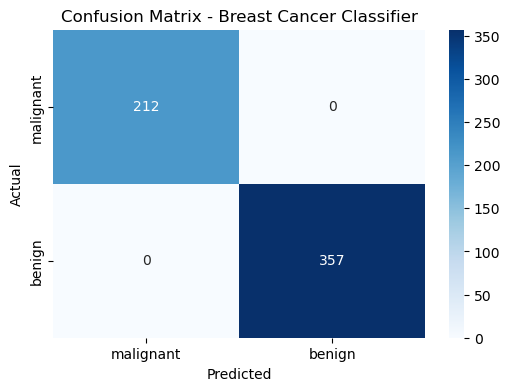

Classification Report:

              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00       212
      benign       1.00      1.00      1.00       357

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on full dataset (we trained on all of it, no split)
y_pred = clf.predict(cancer.data)
y_true = cancer.target

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = cancer.target_names

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Breast Cancer Classifier')
plt.show()

# Print classification metrics
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))